<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Stacked Charts**


Estimated time needed: **45** minutes


In this lab, you will focus on visualizing data specifically using stacked charts. You will use SQL queries to extract the necessary data and apply stacked charts to analyze the composition and comparison within the data.


## Objectives


In this lab, you will perform the following:


- Visualize the composition of data using stacked charts.

- Compare multiple variables across different categories using stacked charts.

- Analyze trends within stacked chart visualizations.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib


**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



### Step 1: Download the dataset


In [3]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-04-03 06:44:14--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  71.9MB/s    in 2.1s    

2025-04-03 06:44:17 (71.9 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

### Load the data


In [11]:
df = pd.read_csv("survey-data.csv")

### Display the first few rows of the data to understand its structure


In [15]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Stacked Chart for Composition of Job Satisfaction Across Age Groups


##### 1. Stacked Chart of Median `JobSatPoints_6` and `JobSatPoints_7` for Different Age Groups


Visualize the composition of job satisfaction scores (`JobSatPoints_6` and `JobSatPoints_7`) across various age groups. This will help in understanding the breakdown of satisfaction levels across different demographics.



/tmp/ipykernel_1088/2265162553.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_sat.groupby('Age').agg({


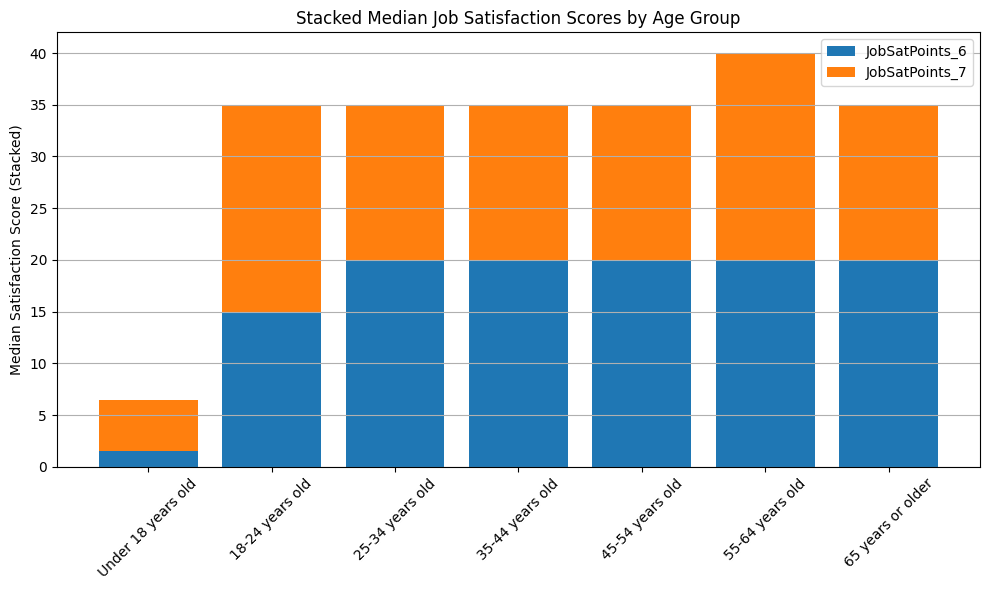

In [8]:
# 必要な列と欠損除去
df_sat = df[['Age', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# 年齢カテゴリの順序を定義
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_sat = df_sat[df_sat['Age'].isin(age_order)]
df_sat['Age'] = pd.Categorical(df_sat['Age'], categories=age_order, ordered=True)

# 年齢ごとに中央値を集計
grouped = df_sat.groupby('Age').agg({
    'JobSatPoints_6': 'median',
    'JobSatPoints_7': 'median'
}).reset_index()

# Stacked Bar Chart を描画
plt.figure(figsize=(10, 6))
plt.bar(grouped['Age'], grouped['JobSatPoints_6'], label='JobSatPoints_6')
plt.bar(grouped['Age'], grouped['JobSatPoints_7'], bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7')

# ラベルと装飾
plt.xticks(rotation=45)
plt.ylabel('Median Satisfaction Score (Stacked)')
plt.title('Stacked Median Job Satisfaction Scores by Age Group')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


##### Stacked Chart of `JobSatPoints_6` and `JobSatPoints_7` for Employment Status


Create a stacked chart to compare job satisfaction (`JobSatPoints_6` and `JobSatPoints_7`) across different employment statuses. This will show how satisfaction varies by employment type.


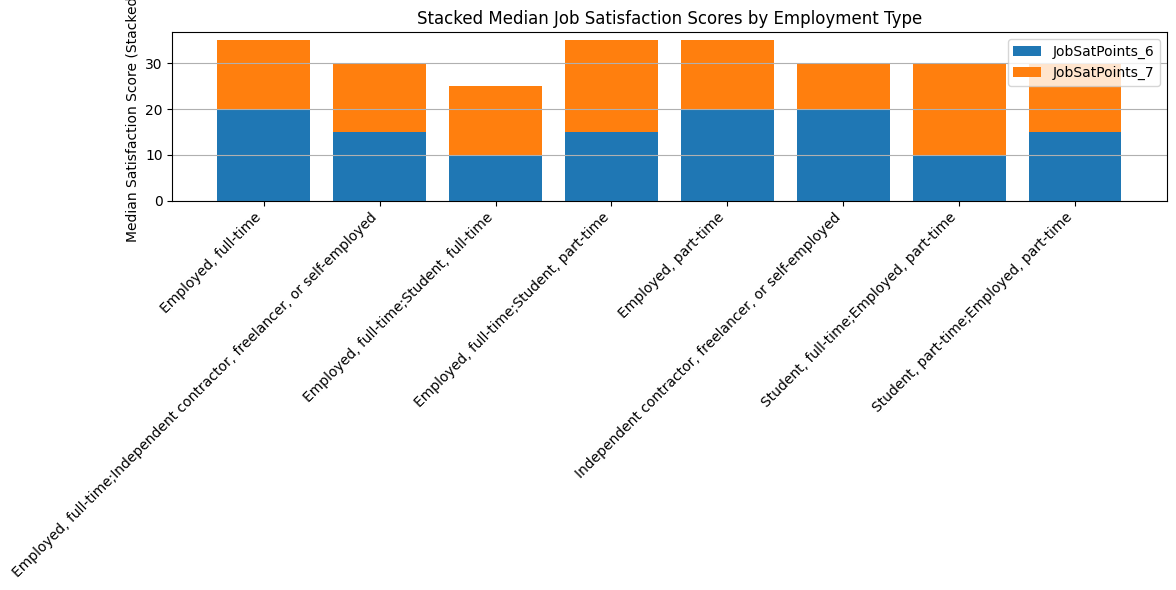

In [9]:
# 対象カラムを抽出して欠損除去
df_emp = df[['Employment', 'JobSatPoints_6', 'JobSatPoints_7']].dropna()

# Employmentの上位カテゴリ（件数順）に絞る（視認性確保：例として上位8件）
top_employment = df_emp['Employment'].value_counts().head(8).index.tolist()
df_emp = df_emp[df_emp['Employment'].isin(top_employment)]

# 雇用形態ごとの中央値を集計
grouped = df_emp.groupby('Employment').agg({
    'JobSatPoints_6': 'median',
    'JobSatPoints_7': 'median'
}).reset_index()

# 描画（Stacked Bar Chart）
plt.figure(figsize=(12, 6))
plt.bar(grouped['Employment'], grouped['JobSatPoints_6'], label='JobSatPoints_6')
plt.bar(grouped['Employment'], grouped['JobSatPoints_7'],
        bottom=grouped['JobSatPoints_6'], label='JobSatPoints_7')

# ラベル・装飾
plt.xticks(rotation=45, ha='right')
plt.ylabel('Median Satisfaction Score (Stacked)')
plt.title('Stacked Median Job Satisfaction Scores by Employment Type')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


### Task 2: Stacked Chart for Compensation and Job Satisfaction by Age Group


##### This stacked chart visualizes the composition of compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) specifically for respondents aged 30-35.


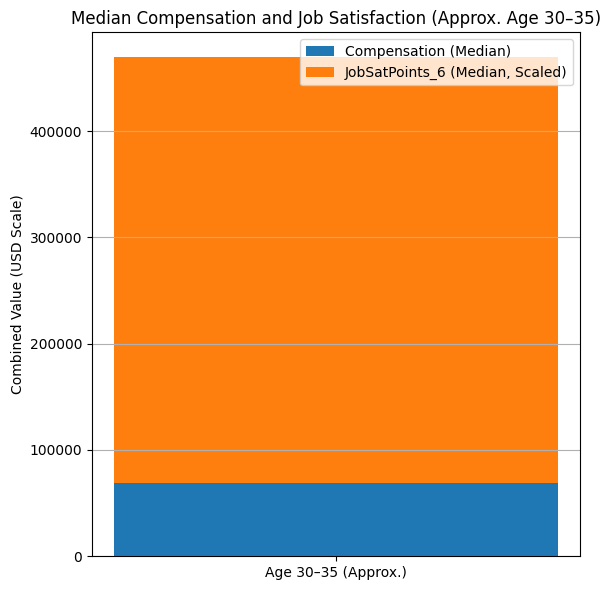

In [19]:
# 対象年齢層を「30〜35歳近辺」として近似
df_sub = df[df['Age'].isin(['25-34 years old', '35-44 years old'])][['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# 数値変換
df_sub['ConvertedCompYearly'] = pd.to_numeric(df_sub['ConvertedCompYearly'], errors='coerce')
df_sub['JobSatPoints_6'] = pd.to_numeric(df_sub['JobSatPoints_6'], errors='coerce')
df_sub = df_sub.dropna()

# 中央値を取得
median_comp = df_sub['ConvertedCompYearly'].median()
median_sat = df_sub['JobSatPoints_6'].median()
scaled_median_sat = median_sat * 20000  # 満足度スコアのスケーリング

# 積み上げ棒グラフ
plt.figure(figsize=(6, 6))
plt.bar('Age 30–35 (Approx.)', median_comp, label='Compensation (Median)')
plt.bar('Age 30–35 (Approx.)', scaled_median_sat, bottom=median_comp, label='JobSatPoints_6 (Median, Scaled)')
plt.ylabel('Combined Value (USD Scale)')
plt.title('Median Compensation and Job Satisfaction (Approx. Age 30–35)')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


##### Stacked Chart of Median Compensation and Job Satisfaction Across Age Group


Compare the median compensation and job satisfaction metrics across different age groups. This helps visualize how compensation and satisfaction levels differ by age.


/tmp/ipykernel_1088/1769453889.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_age.groupby('Age').agg({


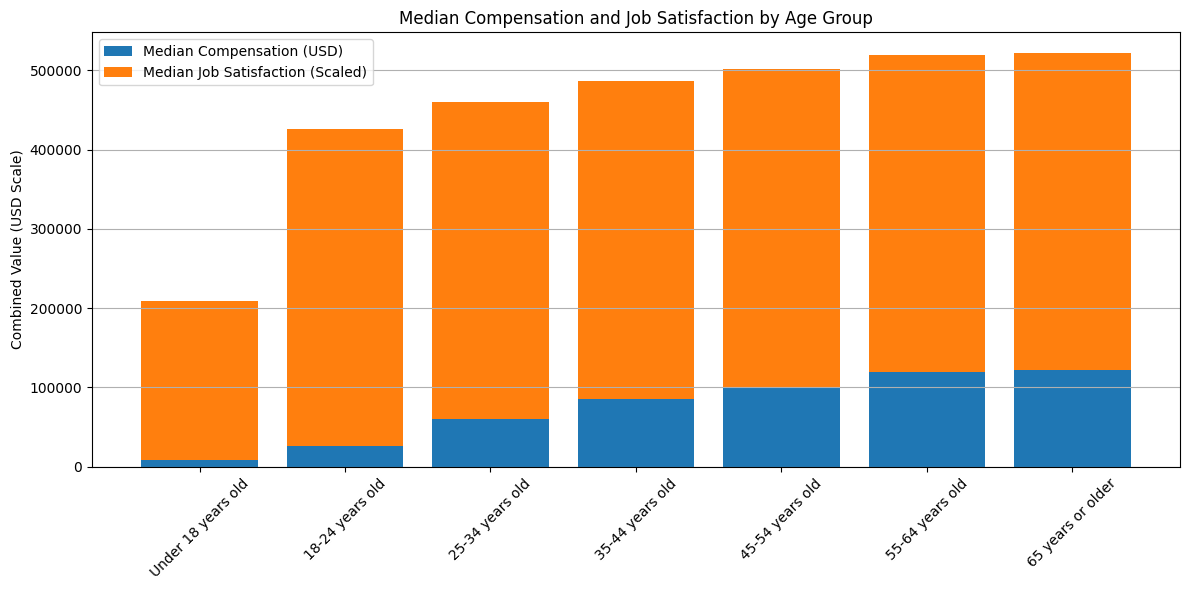

In [20]:
# 必要なカラムと欠損除去
df_age = df[['Age', 'ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# 年齢カテゴリの順序を定義
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_age = df_age[df_age['Age'].isin(age_order)]
df_age['Age'] = pd.Categorical(df_age['Age'], categories=age_order, ordered=True)

# 数値変換
df_age['ConvertedCompYearly'] = pd.to_numeric(df_age['ConvertedCompYearly'], errors='coerce')
df_age['JobSatPoints_6'] = pd.to_numeric(df_age['JobSatPoints_6'], errors='coerce')
df_age = df_age.dropna()

# 各年齢カテゴリでの中央値を計算
grouped = df_age.groupby('Age').agg({
    'ConvertedCompYearly': 'median',
    'JobSatPoints_6': 'median'
}).reset_index()

# 満足度スコアを年収スケールに合わせてスケーリング
grouped['JobSat_scaled'] = grouped['JobSatPoints_6'] * 20000  # スケーリング倍率は任意調整可

# 積み上げ棒グラフを描画
plt.figure(figsize=(12, 6))
plt.bar(grouped['Age'], grouped['ConvertedCompYearly'], label='Median Compensation (USD)')
plt.bar(grouped['Age'], grouped['JobSat_scaled'],
        bottom=grouped['ConvertedCompYearly'],
        label='Median Job Satisfaction (Scaled)')

# ラベルと装飾
plt.ylabel('Combined Value (USD Scale)')
plt.title('Median Compensation and Job Satisfaction by Age Group')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


### Task 3: Comparing Data Using Stacked Charts


##### 1. Stacked Chart of Preferred Databases by Age Group




Visualize the top databases that respondents from different age groups wish to learn. Create a stacked chart to show the proportion of each database in each age group.


/tmp/ipykernel_1088/1034718545.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  db_counts = df_db.groupby(['Age', 'Database']).size().reset_index(name='Count')


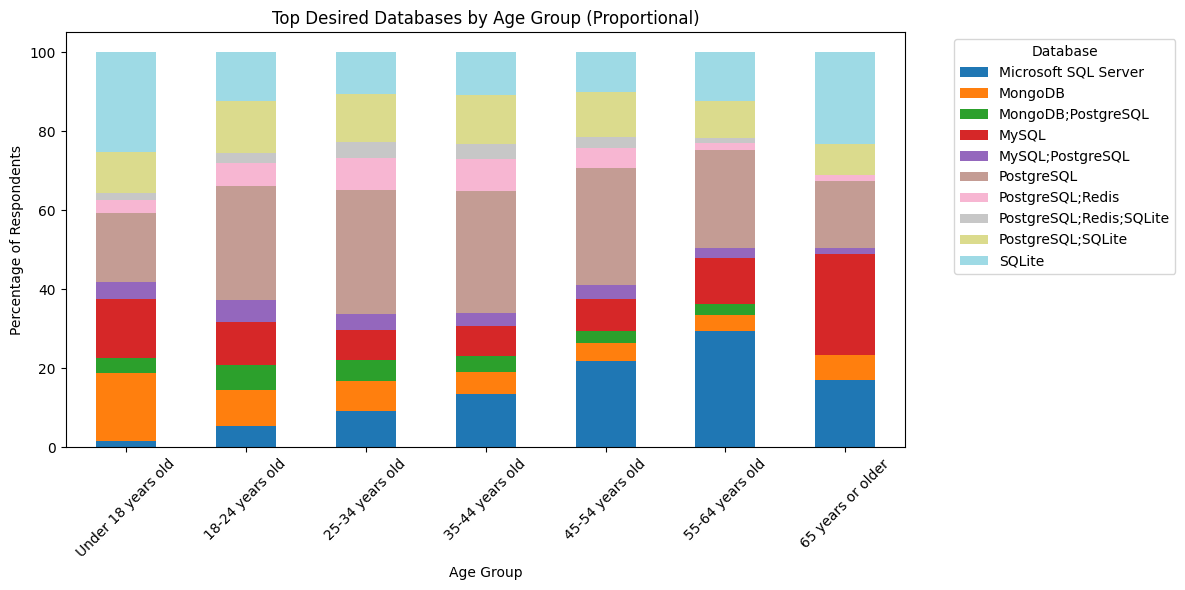

In [21]:
# 必要なカラムを抽出し、欠損除去
df_db = df[['Age', 'DatabaseWantToWorkWith']].dropna()

# 年齢カテゴリの順序を定義
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_db = df_db[df_db['Age'].isin(age_order)]
df_db['Age'] = pd.Categorical(df_db['Age'], categories=age_order, ordered=True)

# データベースを分割・展開
df_db['Database'] = df_db['DatabaseWantToWorkWith'].str.split(',')
df_db = df_db.explode('Database')
df_db['Database'] = df_db['Database'].str.strip()

# 上位10のデータベースのみ対象とする（視認性のため）
top_dbs = df_db['Database'].value_counts().head(10).index.tolist()
df_db = df_db[df_db['Database'].isin(top_dbs)]

# 年齢 × データベースの集計
db_counts = df_db.groupby(['Age', 'Database']).size().reset_index(name='Count')

# ピボット（Ageをインデックス、Databaseを列） → 積み上げ用に整形
pivot = db_counts.pivot(index='Age', columns='Database', values='Count').fillna(0)

# 各年齢層での割合（%）に変換（行方向で合計100に正規化）
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 積み上げ棒グラフを描画
pivot_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# グラフ装飾
plt.title('Top Desired Databases by Age Group (Proportional)')
plt.ylabel('Percentage of Respondents')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Database', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart of Employment Type by Job Satisfaction


Analyze the distribution of employment types within each job satisfaction level using a stacked chart. This will provide insights into how employment types are distributed across various satisfaction ratings.


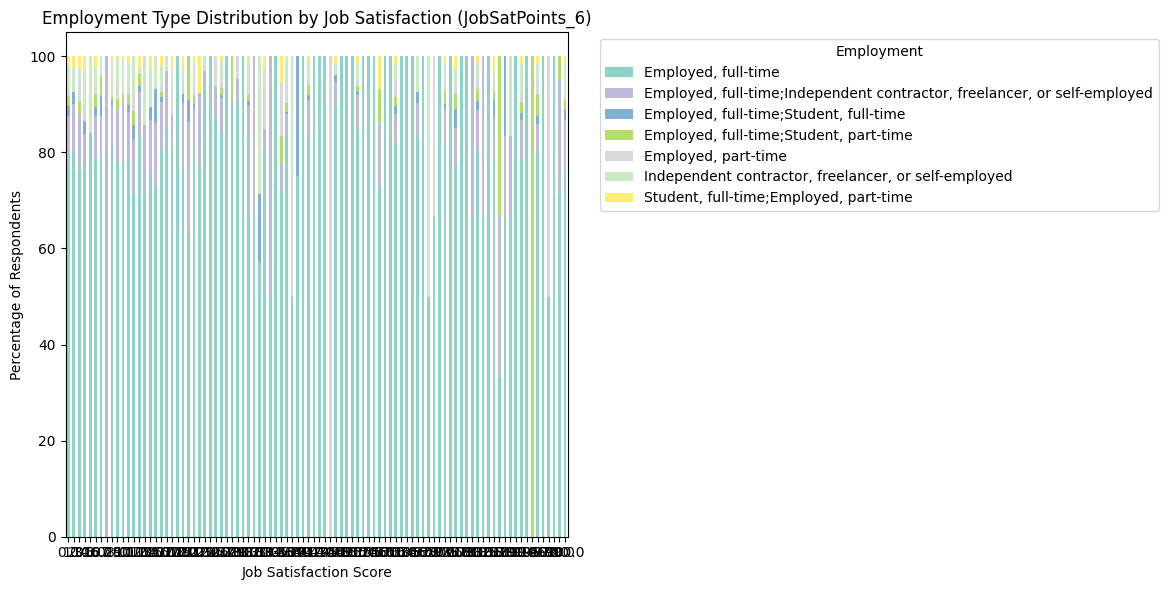

In [23]:
# 欠損除去
df_emp = df[['JobSatPoints_6', 'Employment']].dropna()

# Employmentの上位カテゴリ（視認性のため上位7種に絞る）
top_employment = df_emp['Employment'].value_counts().head(7).index.tolist()
df_emp = df_emp[df_emp['Employment'].isin(top_employment)]

# 数値変換（astype は削除）
df_emp['JobSatPoints_6'] = pd.to_numeric(df_emp['JobSatPoints_6'], errors='coerce')
df_emp = df_emp.dropna()

# 集計：JobSatごとにEmploymentの件数
grouped = df_emp.groupby(['JobSatPoints_6', 'Employment']).size().reset_index(name='Count')

# ピボットテーブル化
pivot = grouped.pivot(index='JobSatPoints_6', columns='Employment', values='Count').fillna(0)

# パーセンテージ化（行ごとに合計100％）
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 積み上げ棒グラフを描画
pivot_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')

# グラフ装飾
plt.title('Employment Type Distribution by Job Satisfaction (JobSatPoints_6)')
plt.xlabel('Job Satisfaction Score')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Employment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Task 4: Exploring Technology Preferences Using Stacked Charts


##### 1. Stacked Chart for Preferred Programming Languages by Age Group


Analyze how programming language preferences (`LanguageAdmired`) vary across age groups.


/tmp/ipykernel_1088/3844863800.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lang_counts = df_lang.groupby(['Age', 'Language']).size().reset_index(name='Count')


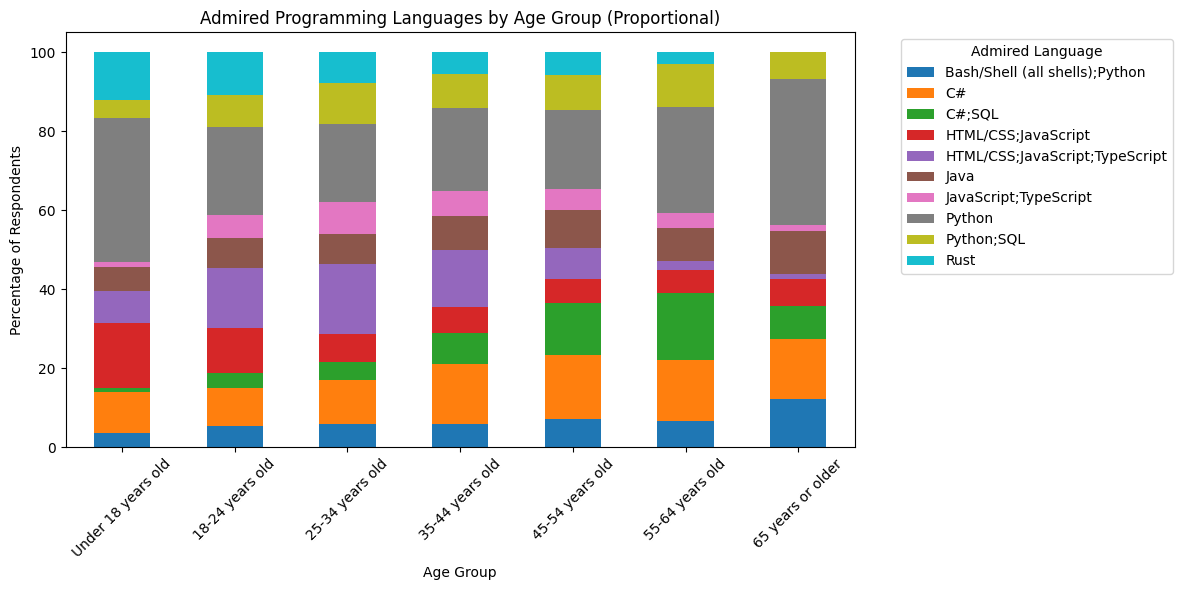

In [24]:
# 対象カラムを抽出して欠損除去
df_lang = df[['Age', 'LanguageAdmired']].dropna()

# 年齢カテゴリの順序を定義
age_order = [
    'Under 18 years old', '18-24 years old', '25-34 years old',
    '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older'
]
df_lang = df_lang[df_lang['Age'].isin(age_order)]
df_lang['Age'] = pd.Categorical(df_lang['Age'], categories=age_order, ordered=True)

# 言語をカンマで分割・展開
df_lang['Language'] = df_lang['LanguageAdmired'].str.split(',')
df_lang = df_lang.explode('Language')
df_lang['Language'] = df_lang['Language'].str.strip()

# 上位10言語に限定（人気順）
top_languages = df_lang['Language'].value_counts().head(10).index.tolist()
df_lang = df_lang[df_lang['Language'].isin(top_languages)]

# 年齢 × 言語の集計
lang_counts = df_lang.groupby(['Age', 'Language']).size().reset_index(name='Count')

# ピボット化して積み上げ用に整形
pivot = lang_counts.pivot(index='Age', columns='Language', values='Count').fillna(0)

# 各年齢層で合計100％になるように正規化（構成比）
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 積み上げ棒グラフで描画
pivot_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')

# グラフ装飾
plt.title('Admired Programming Languages by Age Group (Proportional)')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45)
plt.legend(title='Admired Language', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 2. Stacked Chart for Technology Adoption by Employment Type


Explore how admired platforms (`PlatformAdmired`) differ across employment types (e.g., full-time, freelance)


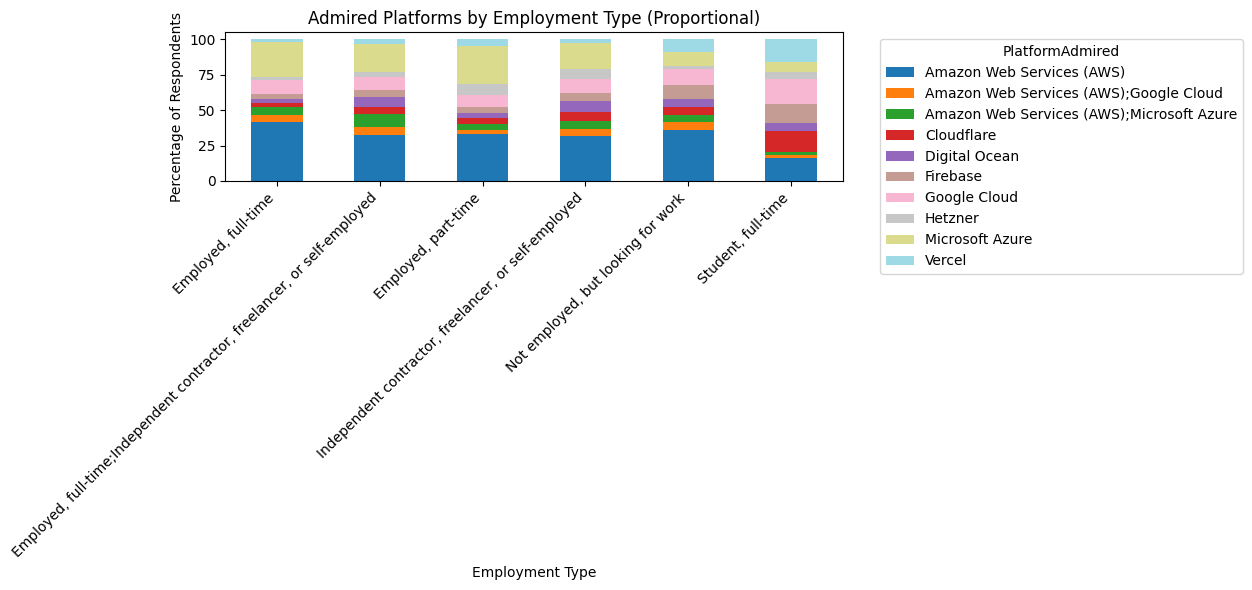

In [25]:
# 対象カラムを抽出し、欠損を除去
df_platform = df[['Employment', 'PlatformAdmired']].dropna()

# Employmentの上位カテゴリ（視認性確保のため上位6件に絞る）
top_employment = df_platform['Employment'].value_counts().head(6).index.tolist()
df_platform = df_platform[df_platform['Employment'].isin(top_employment)]

# カンマ区切りのプラットフォームを分割・展開
df_platform['Platform'] = df_platform['PlatformAdmired'].str.split(',')
df_platform = df_platform.explode('Platform')
df_platform['Platform'] = df_platform['Platform'].str.strip()

# 上位10プラットフォームに絞る
top_platforms = df_platform['Platform'].value_counts().head(10).index.tolist()
df_platform = df_platform[df_platform['Platform'].isin(top_platforms)]

# Employment × Platform の件数を集計
platform_counts = df_platform.groupby(['Employment', 'Platform']).size().reset_index(name='Count')

# ピボットテーブルに変換
pivot = platform_counts.pivot(index='Employment', columns='Platform', values='Count').fillna(0)

# 各雇用形態に対して割合（%）で正規化
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

# 積み上げ棒グラフを描画
pivot_percent.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# グラフ装飾
plt.title('Admired Platforms by Employment Type (Proportional)')
plt.xlabel('Employment Type')
plt.ylabel('Percentage of Respondents')
plt.xticks(rotation=45, ha='right')
plt.legend(title='PlatformAdmired', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Final Step: Review


In this lab, you focused on using stacked charts to understand the composition and comparison within the dataset. Stacked charts provided insights into job satisfaction, compensation, and preferred databases across age groups and employment types.


## Summary


After completing this lab, you will be able to:

- Use stacked charts to analyze the composition of data across categories, such as job satisfaction and compensation by age group.

- Compare data across different dimensions using stacked charts, enhancing your ability to communicate complex relationships in the data.

- Visualize distributions across multiple categories, such as employment type by satisfaction, to gain a deeper understanding of patterns within the dataset.


## Author:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
